In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os, math
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from pandas_summary import DataFrameSummary
from tqdm import tqdm, tqdm_notebook
from pathlib import Path
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 400)
sns.set()

os.chdir("../")

from utils import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
DATA_PATH = "data/"
TEMP_PATH = "tmp/"

In [7]:
data_undersampled = pd.read_feather(f'{TEMP_PATH}data_undersampled.feather')

In [8]:
data_undersampled.head()

,index,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,2,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11,no,11.0,0,1,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,8,4,64,16,121,4,1.777778,1.0,121.00,64,4
1,7,ID_3e04e571e,130000.0,1,2,0,1,1,0,0.0,0,1,1,2,1,3,2,2,4,4,4,0,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,1.0,9,no,10.0,1,0,0,0,0,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,7,0,49,16,81,4,16.000000,1.0,100.00,49,4
2,11,ID_de822510c,100000.0,0,3,0,1,1,0,0.0,0,0,0,0,2,2,0,2,2,2,2,12,0.0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,bb2094100,1,1,0,2,1.0,no,11,23.0,0,0,0,0,0,0,1,0,0,2,1.000000,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,144,324,4,0,1,1.000000,1.0,529.00,324,4
3,13,ID_064b57869,0.0,0,4,0,1,1,1,1.0,0,1,1,0,1,1,0,2,2,2,2,4,0.0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,c51f9c774,0,2,1,2,1.0,no,4,9.5,0,1,0,0,0,0,0,0,0,2,1.000000,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,79,16,6241,4,0,0,1.000000,1.0,90.25,6241,4
4,19,ID_35b66f7c6,215000.0,0,4,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,2,12,0.0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,d29058053,0,2,0,2,0.0,15,no,13.5,0,0,0,0,0,0,1,0,0,2,1.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,22,144,484,4,225,0,1.000000,0.0,182.25,484,4


# Random Forest

In [72]:
X = data_undersampled.drop(['index','Id','idhogar','Target', 'edjefe', 'edjefa'], axis=1)
y = data_undersampled['Target']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [74]:
X_train.shape

(4043, 138)

In [75]:
y_train.shape

(4043,)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
clf = RandomForestClassifier(n_estimators=40, max_features=0.25)

In [78]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
preds = clf.predict(X_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          1       0.94      0.91      0.92       168
          2       0.89      0.93      0.91       308
          3       0.88      0.91      0.90       222
          4       0.89      0.84      0.86       313

avg / total       0.90      0.90      0.89      1011



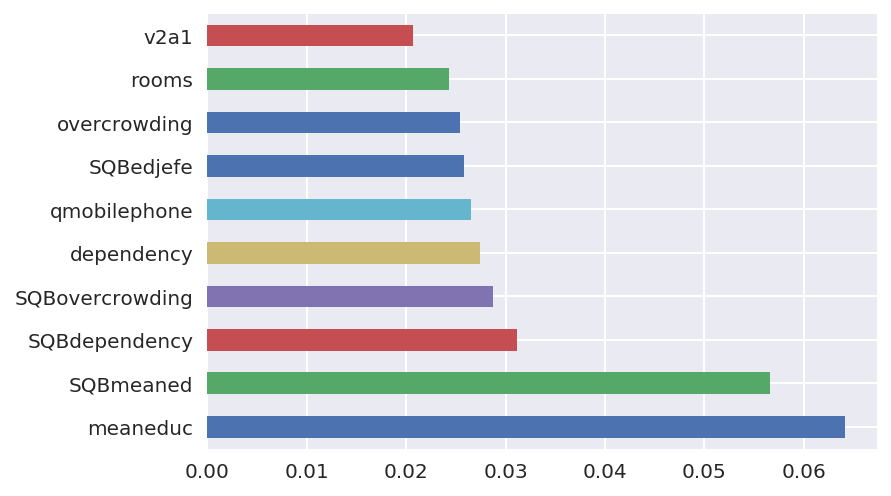

In [81]:
importances = clf.feature_importances_

(pd.Series(importances, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [87]:
columns = pd.Series(importances, index=X.columns)[importances>0.005].reset_index()['index'].values

In [95]:
clf = RandomForestClassifier(n_estimators=100, max_features=0.25)
clf.fit(X_train[columns], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
preds = clf.predict(X_test[columns])
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          1       0.96      0.93      0.95       168
          2       0.90      0.95      0.93       308
          3       0.90      0.95      0.92       222
          4       0.92      0.85      0.88       313

avg / total       0.92      0.92      0.92      1011



In [97]:
test_data=pd.read_csv(f'{DATA_PATH}test.csv')

In [102]:
from utils.utils import data_cleaning

In [103]:
test_data=data_cleaning(test_data)
ids=test_data['Id']
test_data.drop(['Id', 'idhogar'], axis=1, inplace=True)

In [105]:
test_predictions=clf.predict(test_data[columns])

In [106]:
test_predictions[:5]

array([4, 4, 4, 4, 4])

In [107]:
submit=pd.DataFrame({'Id': ids, 'Target': test_predictions})
submit.to_csv(f'{TEMP_PATH}/output/submit.csv', index=False)